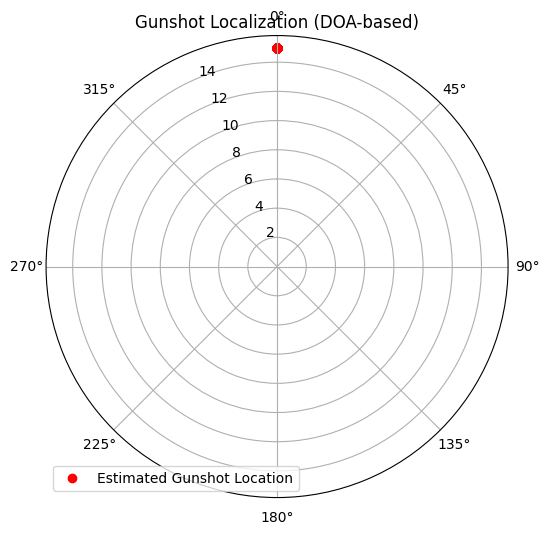

Unique DOA 1: 0.03 degrees
Unique DOA 2: 0.03 degrees
Unique DOA 3: -0.03 degrees
Unique DOA 4: -0.05 degrees
Unique DOA 5: 0.02 degrees
Unique DOA 6: -0.01 degrees
Unique DOA 7: 0.01 degrees
Unique DOA 8: 0.02 degrees
Unique DOA 9: 0.04 degrees
Unique DOA 10: -0.03 degrees
Unique DOA 11: 0.07 degrees
Unique DOA 12: 0.02 degrees
Unique DOA 13: -0.02 degrees
Unique DOA 14: -0.02 degrees
Unique DOA 15: -0.03 degrees
Unique DOA 16: -0.00 degrees
Unique DOA 17: 0.04 degrees
Unique DOA 18: 0.03 degrees
Unique DOA 19: -0.04 degrees
Unique DOA 20: 0.02 degrees
Unique DOA 21: -0.02 degrees
Unique DOA 22: -0.02 degrees
Unique DOA 23: 0.01 degrees
Unique DOA 24: -0.02 degrees
Unique DOA 25: -0.02 degrees
Unique DOA 26: -0.02 degrees
Unique DOA 27: -0.03 degrees
Unique DOA 28: 0.02 degrees
Unique DOA 29: -0.02 degrees
Unique DOA 30: 0.02 degrees
Unique DOA 31: -0.03 degrees
Unique DOA 32: -0.01 degrees
Unique DOA 33: 0.02 degrees
Unique DOA 34: 0.03 degrees
Unique DOA 35: -0.01 degrees
Unique DOA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
SPEED_OF_SOUND = 343  # Speed of sound in air (m/s)
MIC_DISTANCE = 10  # Mic spacing (assumption)

# Load dataset
csv_file = "combined_features.csv"  
data = pd.read_csv(csv_file)

# Extract TDOA values
tdoa_values = data["TDOA_1_2"].values  

# Function to compute DOA from TDOA
def compute_doa(tdoa):
    """
    Compute the Direction of Arrival (DOA) using TDOA
    :param tdoa: Time Difference of Arrival (s)
    :return: Angle of Arrival (radians)
    """
    sin_theta = (tdoa * SPEED_OF_SOUND) / MIC_DISTANCE
    sin_theta = np.clip(sin_theta, -1, 1)  # Fix: Ensure valid range
    return np.arcsin(sin_theta)

# Compute DOA for each sample (convert to radians for polar plot)
doa_values = np.array([compute_doa(t) for t in tdoa_values])

# Assume gunshot is within 15m radius
radius = 15  

# Convert DOA to (X, Y) coordinates
x_coords = radius * np.cos(doa_values)
y_coords = radius * np.sin(doa_values)

# Visualization: Polar Plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6, 6))
ax.set_theta_zero_location('N')  # North as 0 degrees
ax.set_theta_direction(-1)  # Clockwise direction

# Plot gunshot directions
ax.scatter(doa_values, [radius] * len(doa_values), c='red', marker='o', label="Estimated Gunshot Location")

# Formatting
ax.set_rlabel_position(-22.5)  
ax.set_title("Gunshot Localization (DOA-based)")
ax.legend()

plt.show()

# Print estimated DOA values
# Convert DOA values to degrees and find unique values
unique_doa_degrees = np.degrees(doa_values)

# Print unique DOA values
for i, doa in enumerate(unique_doa_degrees):
    print(f"Unique DOA {i+1}: {doa:.2f} degrees")

